In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler

## data loading

In [2]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49368 entries, 0 to 49367
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              49368 non-null  int64  
 1   Sex             49368 non-null  object 
 2   Length          49368 non-null  float64
 3   Diameter        49368 non-null  float64
 4   Height          49368 non-null  float64
 5   Weight          49368 non-null  float64
 6   Shucked Weight  49368 non-null  float64
 7   Viscera Weight  49368 non-null  float64
 8   Shell Weight    49368 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 3.4+ MB


## data Cleaning

In [5]:
#check null in train data
train_data_null_num=train_data.isnull().sum().sum()
test_data_null_num=test_data.isnull().sum().sum()
print(f"number of null with train {train_data_null_num} , and with test { test_data_null_num}")

number of null with train 0 , and with test 0


In [6]:
#check duplcated in train data
train_data_dup=train_data.duplicated().sum()
test_data_dup=test_data.duplicated().sum()
print(f"number of null with train {train_data_dup} , and with test { test_data_dup}")
#### data is very clean

number of null with train 0 , and with test 0


In [7]:
# check  unique vaules in sex Col
train_data["Sex"].unique()

array(['I', 'M', 'F'], dtype=object)

In [8]:
# map SEX to numerical data
def change_Sex_2_num(val):
    if val=="I":
       return 0
    elif val =='M':
        return 1
    else:
        return 2

train_data["Sex"]=train_data["Sex"].apply(lambda x:change_Sex_2_num(x))
test_data["Sex"]=test_data["Sex"].apply(lambda x:change_Sex_2_num(x))

## plot ths data

In [9]:
data_columns=['Sex', 'Length', 'Diameter', 'Height', 'Weight',
       'Shucked Weight', 'Viscera Weight', 'Shell Weight']

In [10]:
# convert data to numpy array
X_train=np.array(train_data.drop(columns=["id","Age"]))
X_test=np.array(test_data.drop(columns=["id"]))
y_train=np.array(train_data["Age"])


In [11]:
#scale data
std_scaled=StandardScaler()
X_train=std_scaled.fit_transform(X_train)
X_test=std_scaled.fit_transform(X_test)

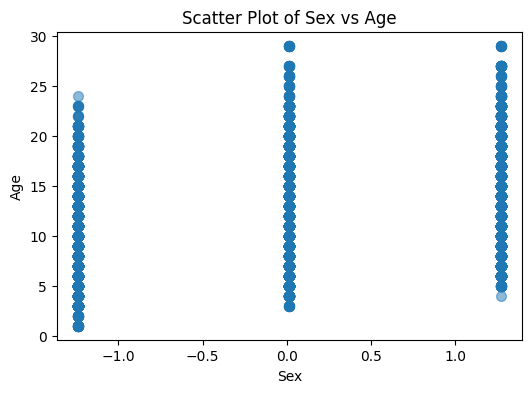

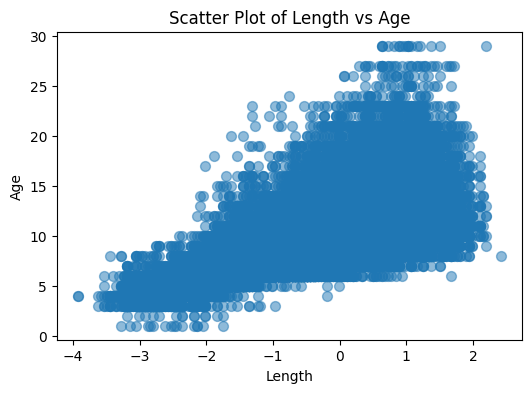

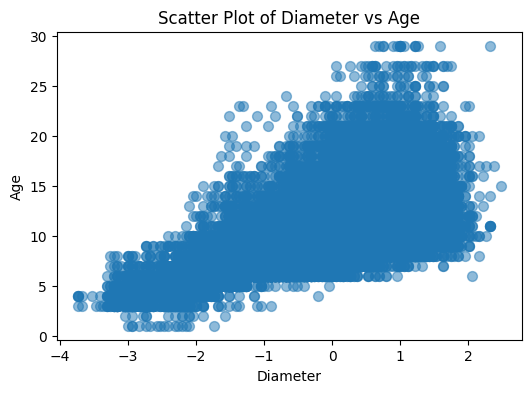

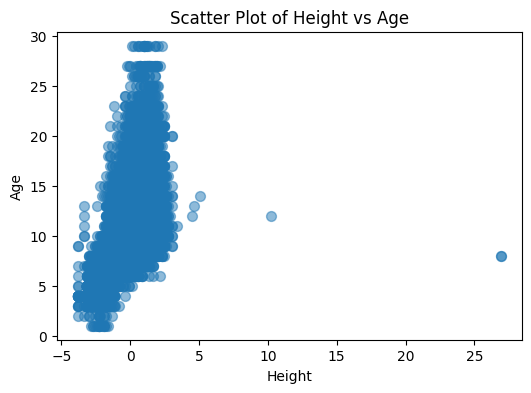

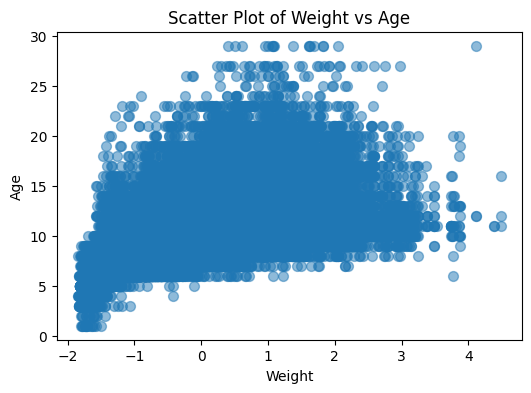

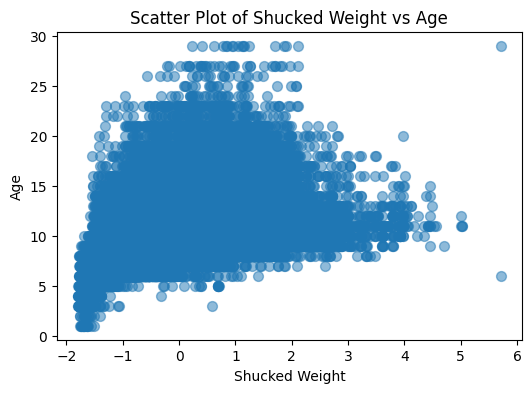

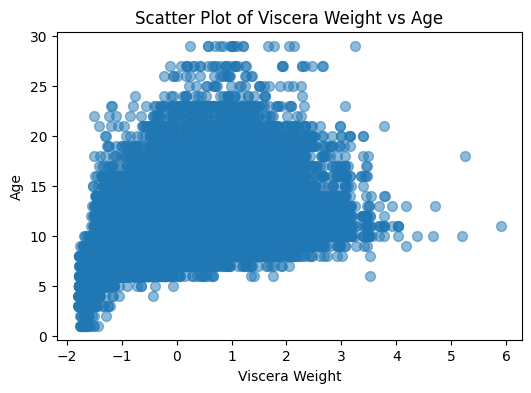

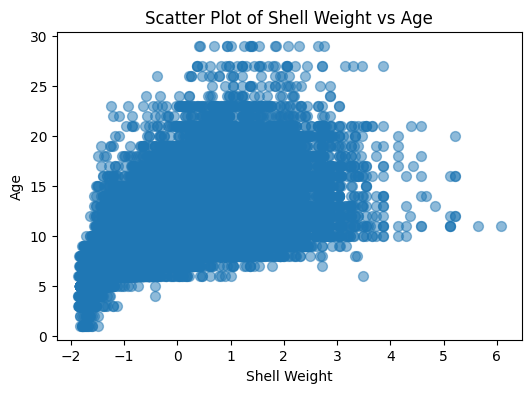

In [12]:
for i in range(len(data_columns)):
    plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
    plt.scatter(X_train[:,i], y_train, marker='o', s=50, alpha=0.5)
    plt.title(f'Scatter Plot of {data_columns[i]} vs Age')
    plt.xlabel(data_columns[i])
    plt.ylabel('Age')
    plt.show()


In [13]:
# feature engineering
#I noticed some relation between feature and Age (target)
train_data["Height_2"]=train_data["Height"]**2
train_data["Weight"]=train_data["Weight"]**.5
train_data["Shucked Weight_2"]=train_data["Shucked Weight"]**.5
train_data["Viscera Weight_2"]=train_data["Viscera Weight"]**.5
train_data["Shell Weight_2"]=train_data["Shell Weight"]**.5

test_data["Height_2"]=test_data["Height"]**2
test_data["Weight"]=test_data["Weight"]**.5
test_data["Shucked Weight_2"]=test_data["Shucked Weight"]**.5
test_data["Viscera Weight_2"]=test_data["Viscera Weight"]**.5
test_data["Shell Weight_2"]=test_data["Shell Weight"]**.5

In [14]:
## get data after feature engineering
X_train=np.array(train_data.drop(columns=["id","Age"]))
X_test=np.array(test_data.drop(columns=["id"]))
y_train=np.array(train_data["Age"])

In [15]:
## The model
from sklearn.linear_model import Ridge
from  sklearn.metrics import mean_absolute_error
# I used Req model using L2 method
lg_model=Ridge(alpha=.02,max_iter=10000)
lg_model.fit(X_train,y_train)
mean_absolute_error(lg_model.predict(X_train),y_train)


1.4763690552234134

In [16]:
### predict the X test
y_pred=lg_model.predict(X_test)

In [17]:
# add age col for test data
test_data["Age"]=pd.Series(y_pred)

In [18]:
# create submission file to Kaggle
submission=test_data[["id","Age"]]

In [19]:
submission.to_csv("submission.csv",index=False)